# Data Science Project - Airbnb Price Prediction

In [627]:
# DATA CAPSTONE PROJECT
# BY: Dwisha Mehta

In [2]:
import pandas as pd
import numpy as np
import re
import string
from collections import OrderedDict
from cleantext import clean
import emoji
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
from numpy import sqrt
from collections import OrderedDict
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.evaluate import permutation_test
from scipy import stats
from statsmodels.stats import weightstats as stests
from numpy import sqrt, abs, round
from scipy.stats import norm, uniform, zscore
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
import haversine as hs
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from statistics import mean
from sklearn.metrics import mean_absolute_error as mse
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from numpy import absolute
from numpy import sqrt

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [31]:
# cleaned dataset
airbnb = pd.read_csv('airbnb_edited.csv')

In [32]:
airbnb = airbnb.drop(['Unnamed: 0'], axis = 1)

In [33]:
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,floor,noise(dB),price,year,month,day
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9.00000,0.2100,1.0,69.056465,149,2018.0,10.0,19.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45.00000,0.3800,1.0,56.054278,225,2019.0,5.0,21.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0.00000,1.2132,1.0,56.054278,150,2019.0,5.0,21.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270.00000,4.6400,1.0,69.056465,89,2019.0,7.0,5.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9.00000,0.1000,1.0,56.054278,80,2018.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39112,Brooklyn,Bedford Stuyvesant,40.67853,-73.94995,Private room,2,27.35253,1.2132,1.0,69.056465,70,2019.0,7.0,8.0
39113,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,27.35253,1.2132,1.0,69.056465,40,2019.0,7.0,8.0
39114,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,27.35253,1.2132,1.0,56.054278,115,2019.0,7.0,8.0
39115,Manhattan,Hells Kitchen,40.75751,-73.99112,Shared room,1,27.35253,1.2132,1.0,56.054278,55,2019.0,7.0,8.0


# Exploratory Data Analysis

In [7]:
airbnb1 = airbnb[airbnb['price'] < 800]

<AxesSubplot:xlabel='price', ylabel='Density'>

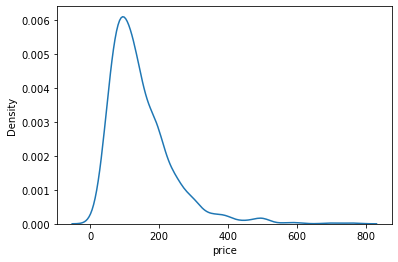

In [8]:
# most price range from 0 to 500
sns.kdeplot(airbnb1['price'][0:800])

<AxesSubplot:xlabel='price', ylabel='Density'>

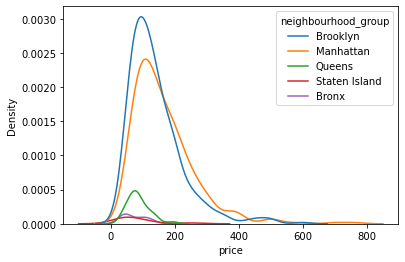

In [9]:
sns.kdeplot(airbnb1['price'][0:800], hue = airbnb['neighbourhood_group'])

In [10]:
airbnb1.shape

(38734, 14)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

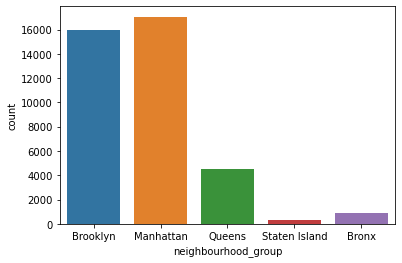

In [11]:
# the countplot shows the frequency of the neighbourhood_group column
# Brooklyn and Manhattan has the highest frequency

sns.countplot(airbnb1['neighbourhood_group'])

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

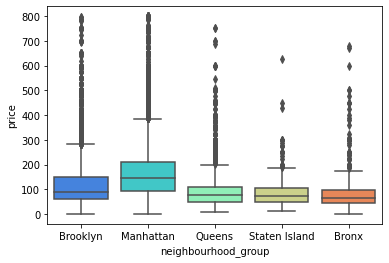

In [12]:
# prices of airbnb in Queens, Staten Island and Bronx are quite similar
# prices in Brooklyn and Manhattan are greater compared to other neighbourhoods
plt.ticklabel_format(style='plain')
sns.boxplot(x='neighbourhood_group',y='price',data=airbnb1,palette='rainbow')

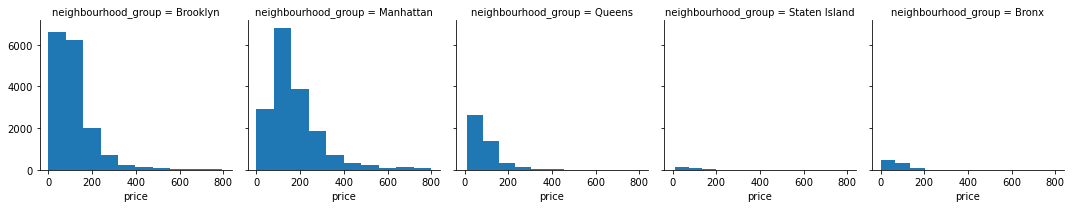

In [13]:
g = sns.FacetGrid(data=airbnb1,col='neighbourhood_group')
g.map(plt.hist,'price')

<AxesSubplot:xlabel='room_type', ylabel='price'>

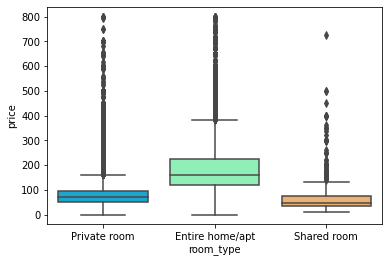

In [14]:
# the prices for entire home is greater than others

plt.ticklabel_format(style='plain')
sns.boxplot(x='room_type',y='price',data=airbnb1,palette='rainbow')

In [15]:
airbnb1['floor'].value_counts()

1.00000     33011
5.00000      5384
2.00000       324
0.00000         7
4.00000         5
17.00000        1
1.58192         1
16.00000        1
Name: floor, dtype: int64

In [16]:
airbnb1['floor']= airbnb1['floor'].astype(int)

<ipython-input-16-2a2a79c28ac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb1['floor']= airbnb1['floor'].astype(int)


<AxesSubplot:xlabel='floor', ylabel='price'>

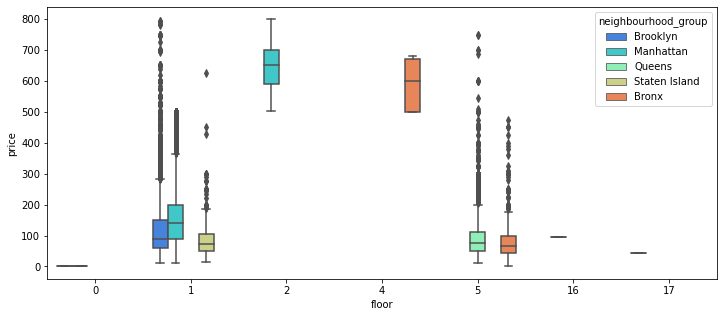

In [17]:
# the prices for 2nd and 3rd floor is higher
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain')
sns.boxplot(x='floor',y='price',data=airbnb1,palette='rainbow', hue= 'neighbourhood_group')

In [18]:
airbnb1['minimum_nights'].value_counts()

1      10054
2       9321
3       6376
30      2906
4       2594
       ...  
133        1
87         1
37         1
56         1
182        1
Name: minimum_nights, Length: 100, dtype: int64

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

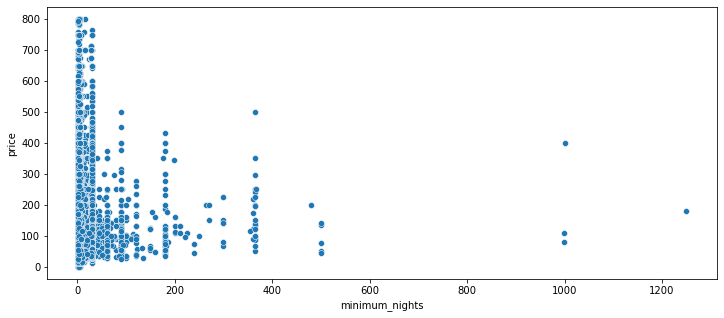

In [19]:
plt.figure(figsize=(12,5))
plt.ticklabel_format(style='plain')
sns.scatterplot(x='minimum_nights',y='price',data=airbnb1,palette='rainbow')

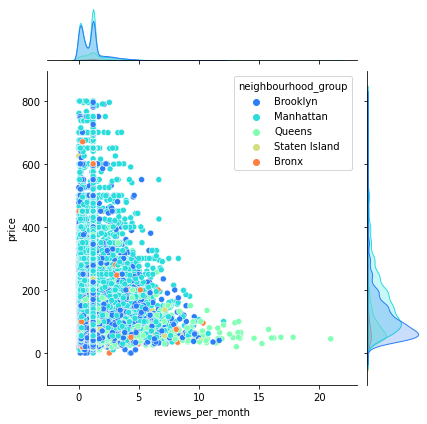

In [20]:
sns.jointplot(x='reviews_per_month',y='price',data=airbnb1,palette='rainbow', hue = 'neighbourhood_group')

<AxesSubplot:xlabel='price', ylabel='reviews_per_month'>

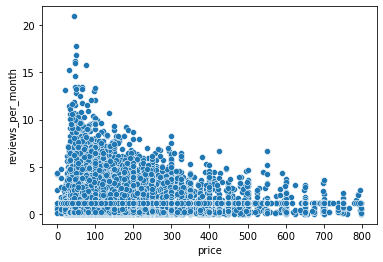

In [21]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x='price',y='reviews_per_month',data=airbnb1,estimator=np.std)